In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.drop("CustomerID",axis=1).describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#Cluster customers into segments based on income and spending score

In [6]:
# Select the relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

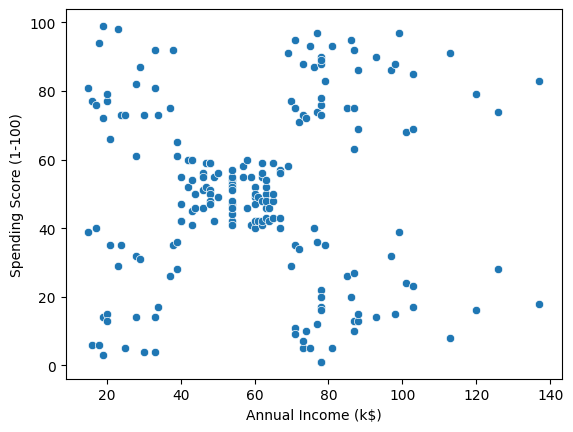

In [7]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X)

In [8]:
from scipy.cluster.hierarchy import linkage, fcluster
Z=linkage(X,method='ward')
X["cluster_labels"]=fcluster(Z,5,criterion='maxclust')

/tmp/ipython-input-3893112073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster_labels"]=fcluster(Z,5,criterion='maxclust')


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

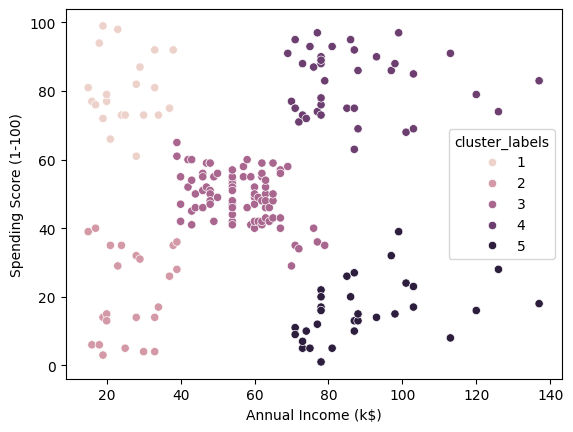

In [9]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster_labels',data=X)

#Perform scaling and visual exploration of groupings

/tmp/ipython-input-420288474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

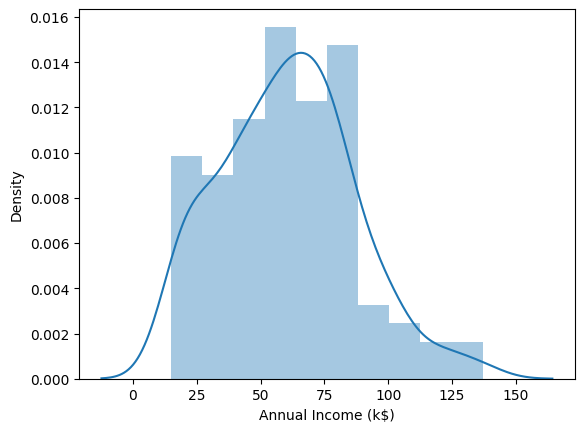

In [19]:
sns.distplot(data['Annual Income (k$)'])

/tmp/ipython-input-3094342287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

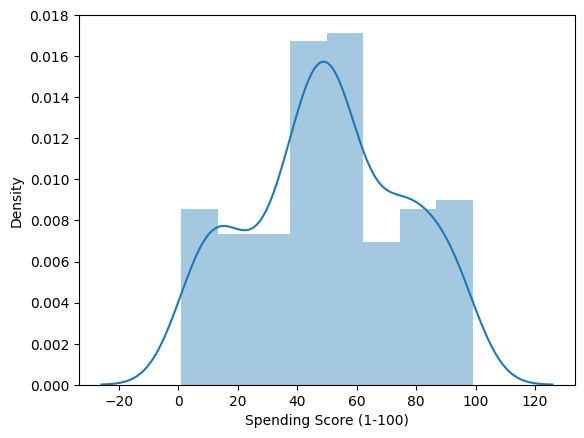

In [21]:
sns.distplot(data['Spending Score (1-100)'])

<Axes: xlabel='count', ylabel='Gender'>

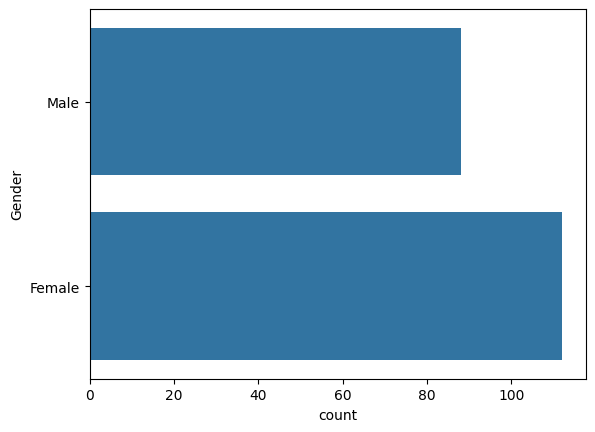

In [22]:
sns.countplot(data['Gender'])

In [10]:
X.var()

,0
Annual Income (k$),689.835578
Spending Score (1-100),666.854271
cluster_labels,1.340603


In [11]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the scaled data to the X DataFrame
X['Annual Income (k$)_scaled'] = X_scaled[:, 0]
X['Spending Score (1-100)_scaled'] = X_scaled[:, 1]

display(X.head())

/tmp/ipython-input-3446806905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Annual Income (k$)_scaled'] = X_scaled[:, 0]


,Annual Income (k$),Spending Score (1-100),cluster_labels,Annual Income (k$)_scaled,Spending Score (1-100)_scaled
0,15,39,2,-1.738999,-0.434801
1,15,81,1,-1.738999,1.195704
2,16,6,2,-1.700830,-1.715913
3,16,77,1,-1.700830,1.040418
4,17,40,2,-1.662660,-0.395980


In [21]:
X=X.drop(['Annual Income (k$)','Spending Score (1-100)','cluster_labels'],axis=1)

In [22]:
X.var()

,0
Annual Income (k$)_scaled,1.005025
Spending Score (1-100)_scaled,1.005025


#Apply K-Means clustering and determine optimal number of clusters

In [23]:
from scipy.cluster.vq import kmeans,vq

In [24]:
#generate cluster centers and labels
cluster_centers,_=kmeans(X,5)
cluster_labels=vq(X,cluster_centers)

<Axes: xlabel='Annual Income (k$)_scaled', ylabel='Spending Score (1-100)_scaled'>

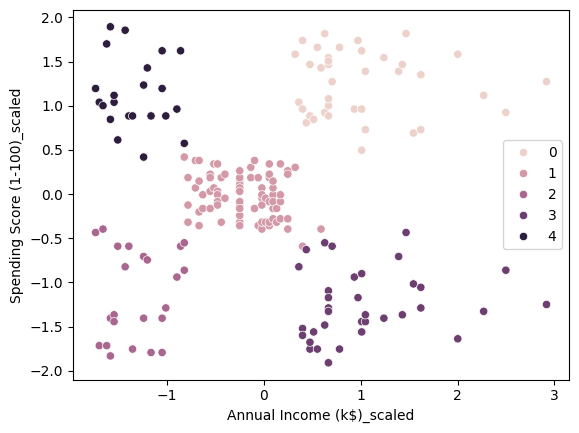

In [25]:
sns.scatterplot(x='Annual Income (k$)_scaled',y='Spending Score (1-100)_scaled',hue=cluster_labels[0],data=X)

In [28]:
distortions=[]
number_of_clusters=range(2,10)

In [29]:
for i in number_of_clusters:
  centroids,distortion=kmeans(X,i)
  distortions.append(distortion)

In [30]:
elbow_plot_data=pd.DataFrame({'number_of_clusters':number_of_clusters,'distortions':distortions})

<Axes: xlabel='number_of_clusters', ylabel='distortions'>

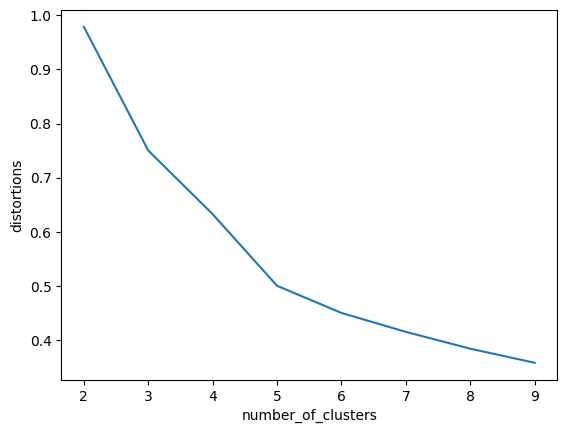

In [31]:
sns.lineplot(x='number_of_clusters',y='distortions',data=elbow_plot_data)

#Visualize clusters using 2D plots

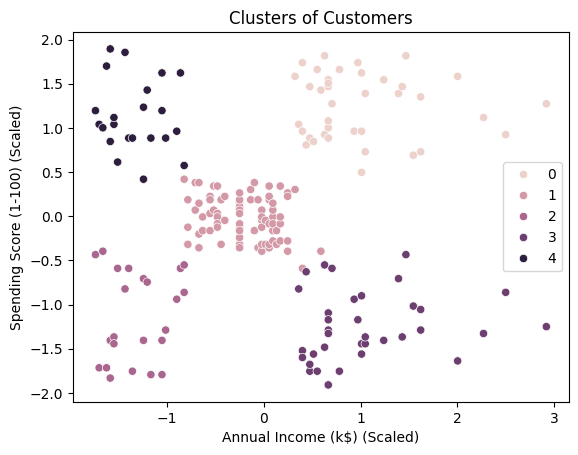

In [32]:
sns.scatterplot(x='Annual Income (k$)_scaled', y='Spending Score (1-100)_scaled', hue=cluster_labels[0], data=X)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.show()

#Visualize the decision boundaries of the K-Means clustering model on a 2D plot using the scaled 'Annual Income (k$)' and 'Spending Score (1-100)' features.

## Create a meshgrid

Generate a grid of points spanning the range of the scaled 'Annual Income (k$)' and 'Spending Score (1-100)' features by creating ranges for x and y axes and then creating a meshgrid.



In [33]:
x_min, x_max = X['Annual Income (k$)_scaled'].min() - 1, X['Annual Income (k$)_scaled'].max() + 1
y_min, y_max = X['Spending Score (1-100)_scaled'].min() - 1, X['Spending Score (1-100)_scaled'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

## Predict clusters for meshgrid

Use the trained K-Means model to predict the cluster label for each point in the meshgrid.
Reshape the meshgrid, predict cluster labels, and reshape the labels back to the original grid shape.


In [34]:
# Reshape the meshgrid into a 2D array
Z_mesh = np.c_[xx.ravel(), yy.ravel()]

# Predict the cluster label for each point in the reshaped meshgrid
_, Z = vq(Z_mesh, cluster_centers)

# Reshape the predicted cluster labels back into the original shape of the meshgrid
Z = Z.reshape(xx.shape)

## Visualize decision boundaries

Plot the contour lines of the predicted cluster labels on the meshgrid, along with the original data points, to show the decision boundaries and add labels and title.



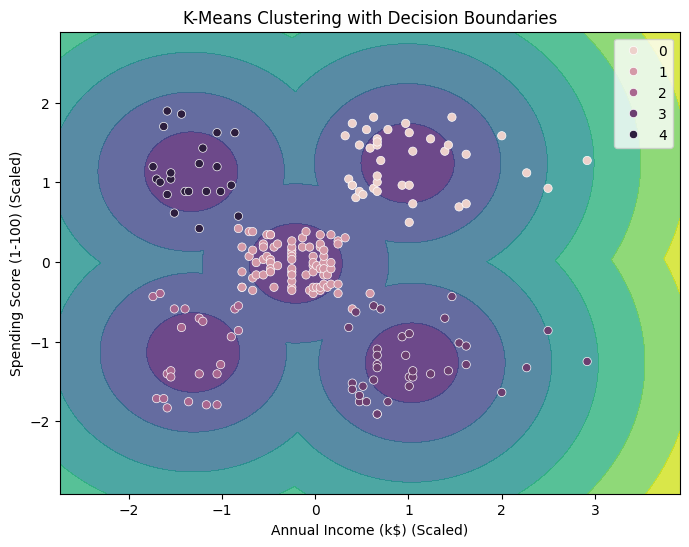

In [35]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x='Annual Income (k$)_scaled', y='Spending Score (1-100)_scaled', hue=cluster_labels[0], data=X)
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A meshgrid was created spanning the range of the scaled 'Annual Income (k\$)' and 'Spending Score (1-100)' features to cover the entire data space for decision boundary visualization.
*   The trained K-Means model was used to predict the cluster label for each point on the generated meshgrid.
*   The decision boundaries of the K-Means clusters were visualized by plotting the contour lines of the predicted cluster labels on the meshgrid, overlaid with the original scaled data points colored by their assigned cluster.


* The visualization clearly shows the separation of the data points into distinct clusters based on annual income and spending score, with the decision boundaries indicating the regions assigned to each cluster by the K-Means model.


Excited to share a project I worked on as part of my internship at Elevvo Pathways!

I performed customer segmentation using K-Means clustering on a dataset containing customer information, including annual income and spending score. The goal was to group customers into distinct segments based on these features.

Key steps involved:
- Data loading and initial exploration.
- Scaling the 'Annual Income (k$)' and 'Spending Score (1-100)' features using `StandardScaler`.
- Applying K-Means clustering to the scaled data.
- Determining the optimal number of clusters using the elbow method.
- Visualizing the clusters and their decision boundaries to understand the segmentation.

This project provided valuable insights into identifying different customer groups, which can be used for targeted marketing strategies and personalized customer experiences.

#customers #segmentation #kmeansclustering #dataanalysis #machinelearning #internship #ElevvoPathways #data science